<h1 style="color:darkblue; text-align:center;"><b>Lending Club Case Study</b></h1>

In [1148]:
## import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import warning libraries and set to ignore warnings to keep notbook presentation clean!
import warnings
warnings.filterwarnings('ignore')

In [1150]:
#Import Data
Loan_Database = pd.read_csv("loan.csv")

In [1151]:
Loan_Database.shape

(39717, 111)

<h2 style="color:darkblue; text-align:center;"><b>Data Cleanup</b></h2>

In [1153]:
#List all the columns with 90% or above null values, and drop such columns
Null_Percentage = Loan_Database.isnull().mean() * 100
Columns_With_High_Nulls = Null_Percentage[Null_Percentage > 90].index.tolist()

#Because all these calumns having more than 90% and some even 0 non-null values, dropping such columns
Loan_Database.drop(columns=Columns_With_High_Nulls, axis=1, inplace=True)

In [1156]:
#Drop other columns those doesn't have any significant values
Loan_Database.drop(columns=['url', 'desc'],axis=1, inplace=True)

In [1158]:
Loan_Database.shape

(39717, 53)

In [1161]:
#Now check no of unique values (null or NaN excluded) in each columns to see if we could drop some more columns with no significant values
Unique_Value_Counts = Loan_Database.apply(lambda x : x.nunique(dropna=True))
print(Unique_Value_Counts)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
mths_since_last_delinq           95
open_acc                    

In [1163]:
#Now that we observed there are some columns with single values, drop all such columns
Col_To_Drop = Unique_Value_Counts[Unique_Value_Counts == 1].index.tolist()
Loan_Database.drop(columns=Col_To_Drop, axis=1, inplace=True)

In [1165]:
#Check for any duplicate rows in Loan Database
Loan_Database.duplicated(subset='id', keep='first').count()

39717

In [1167]:
#From Unique value Counts, id and member_id, both are columns to uniquely identify lender.
#We don't need these columns as these will not provide any value in analysis. Dropping both the columns
Loan_Database.drop(columns=['id', 'member_id'], axis=1, inplace= True)


In [1169]:
Loan_Database.shape

(39717, 42)

## Now that most obvious garbage columns are dropped, Analyse other columns those are either not having good quality data to analyse default possibility


In [1173]:
#Becasue we want to analyse default possibility, that could be only done on loan data which is either fully paid off or Charged Off.
#We can not analyse anything from row where loan is still running. Let's filter out rows based on this criteria.
Loan_Database = Loan_Database[Loan_Database['loan_status'] != 'Current']

In [1175]:
Loan_Database.shape

(38577, 42)

In [1177]:
## Let's check some other colums if they have anything which could be removed or used
print(Loan_Database.emp_title.nunique())
print(Loan_Database.issue_d.nunique())
print(Loan_Database.pub_rec.unique())

28027
55
[0 1 2 3 4]


In [1179]:
#28027 independent title, there fore not much useful. Will be removing this column
#Issue_d also doesn't look much useful as it will not help for loans taken in future
#Zip code also doesn't look much useful when address_state is available
#


## Removing Columns with future data

### Columns with values those are obtained post loan approval are not useful because, lender can't based their loan approval process on data that doesn't exist at the time of loan application, therefore it's better to remove such columns as well. Let's first analyse all such columns:
- emp_title
- zip_code
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- mths_since_last_delinq


In [1182]:
Loan_Database.drop(["emp_title", "zip_code", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt","mths_since_last_delinq"], axis = 1, inplace = True)

In [1184]:
Loan_Database.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'out_prncp_inv', 'total_pymnt_inv',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [1186]:
Loan_Database.pub_rec_bankruptcies.notna().count()

38577

#Also drop columns listed below as these are also post loan sanctioned data
- out_prncp_inv
- total_pymnt_inv
- last_credit_pull_d



In [1189]:
Loan_Database.drop(["out_prncp_inv", "total_pymnt_inv", "last_credit_pull_d"], axis = 1, inplace = True)

In [1191]:
Loan_Database.shape

(38577, 26)

In [1193]:
Loan_Database.to_csv("FinalCleanData.csv")


### title is not requesrted as more accurate data for loan category is present in purpose column
Loan_Database.drop('title', axis = 1, inplace = True)

In [1195]:
Loan_Database.drop('title', axis = 1, inplace= True)

In [1198]:
Loan_Database.shape

(38577, 25)

In [1200]:
Loan_Database.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [1202]:
Loan_Database.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,AZ,27.65,0,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,GA,1.00,0,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,IL,8.72,0,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,CA,20.00,0,Feb-96,1,10,0,21%,37,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,AZ,11.20,0,Nov-04,3,9,0,28.30%,12,0.0


<h2 style="color:darkblue; text-align:center;"><b>Data Formatting</b></h2>

In [1205]:
# Covert term to int
Loan_Database['term'] = Loan_Database['term'].apply(lambda x: int(x.split()[0]))


In [1207]:
#Also Change header term to term in month
Loan_Database.rename(columns={'term' : 'term_in_months'})

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65%,162.87,B,B2,10+ years,RENT,...,AZ,27.65,0,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500,2500.0,60,15.27%,59.83,C,C4,< 1 year,RENT,...,GA,1.00,0,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400,2400.0,36,15.96%,84.33,C,C5,10+ years,RENT,...,IL,8.72,0,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000,10000.0,36,13.49%,339.31,C,C1,10+ years,RENT,...,CA,20.00,0,Feb-96,1,10,0,21%,37,0.0
5,5000,5000,5000.0,36,7.90%,156.46,A,A4,3 years,RENT,...,AZ,11.20,0,Nov-04,3,9,0,28.30%,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07%,78.42,A,A4,4 years,MORTGAGE,...,CO,11.33,0,Nov-90,0,13,0,13.10%,40,NaN
39713,8500,8500,875.0,36,10.28%,275.38,C,C1,3 years,RENT,...,NC,6.40,1,Dec-86,1,6,0,26.90%,9,NaN
39714,5000,5000,1325.0,36,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,MA,2.30,0,Oct-98,0,11,0,19.40%,20,NaN
39715,5000,5000,650.0,36,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,MD,3.72,0,Nov-88,0,17,0,0.70%,26,NaN


In [1209]:
#Check if there are null values to handle those seperately
Loan_Database.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  int64  
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [1211]:
#Int rate doesn't have any null or mission value, so we could directly perform formatting
# Now Convert intrest rate to float
Loan_Database['int_rate'] = Loan_Database['int_rate'].apply(lambda x: float(x.strip('%')))

In [1213]:
#As subgrade has grade as prefix followed by no, let's convert it to integar only
Loan_Database.sub_grade = pd.to_numeric(Loan_Database.sub_grade.apply(lambda x : x[-1]))
Loan_Database.sub_grade.unique()

array([2, 4, 5, 1, 3], dtype=int64)

In [1215]:
#In home ownership, Other and none seperately doesn't add much values, therefore let's replace none with other
Loan_Database['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [1217]:
#Now let's work in emp_length to standrize the vaules
Loan_Database['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [1219]:
#Check mode for value
print(Loan_Database.emp_length.mode())

0    10+ years
Name: emp_length, dtype: object


In [1221]:
#Because there are less percentage of values missing and mode value has for higher frequency, we could safely replace missing values with mode
Loan_Database.emp_length.fillna(Loan_Database.emp_length.mode()[0], inplace = True)

#Now verify that null value count is 0 or not
Loan_Database.emp_length.isna().sum()

0

In [1223]:
#Now let's perform formatting on values
Loan_Database.emp_length = Loan_Database.emp_length.apply(lambda x: int(x.split()[0]) if '+' not in x and '<' not in x else int(x.replace('<','').replace('+', '').split()[0]))



In [1225]:
Loan_Database.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,2,10,RENT,...,AZ,27.65,0,Jan-85,1,3,0,83.70%,9,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,4,1,RENT,...,GA,1.00,0,Apr-99,5,3,0,9.40%,4,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,5,10,RENT,...,IL,8.72,0,Nov-01,2,2,0,98.50%,10,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,1,10,RENT,...,CA,20.00,0,Feb-96,1,10,0,21%,37,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,4,3,RENT,...,AZ,11.20,0,Nov-04,3,9,0,28.30%,12,0.0


In [1227]:
#Let's also convert revol_util to float as it has continuous values. But first drop any null value rows for revol_util as no of null values rows are quite less
Loan_Database.dropna(axis = 0, subset = ['revol_util'] , inplace = True)

#Verfiy that now no null value found in it
Loan_Database.revol_util.isna().sum()


0

In [1229]:
#Now convert value type to float
Loan_Database.revol_util = Loan_Database.revol_util.apply(lambda x: float(x.strip('%')))

In [1231]:
Loan_Database.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,2,10,RENT,...,AZ,27.65,0,Jan-85,1,3,0,83.7,9,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,4,1,RENT,...,GA,1.00,0,Apr-99,5,3,0,9.4,4,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,5,10,RENT,...,IL,8.72,0,Nov-01,2,2,0,98.5,10,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,1,10,RENT,...,CA,20.00,0,Feb-96,1,10,0,21.0,37,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,4,3,RENT,...,AZ,11.20,0,Nov-04,3,9,0,28.3,12,0.0


<h2 style="color:darkblue; text-align:center;"><b>Dealing with outlier values</b></h2>

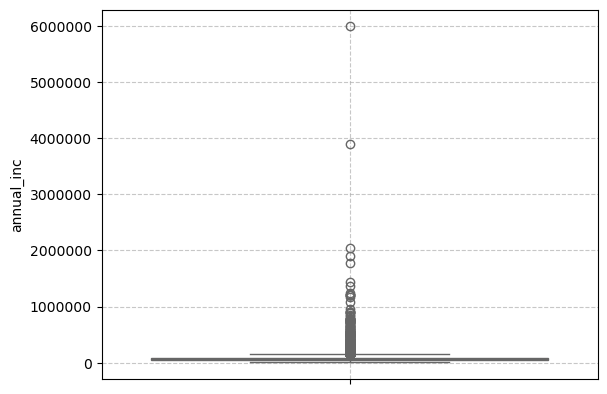

In [1234]:
# Let's start with income, ultra high income persons might pollute the analysis due to their inherit advantage with asset and income stream
sns.boxplot(Loan_Database['annual_inc'])

# Ensure exact values in the y-axis instead of scientific notation
plt.ticklabel_format(style='plain', axis='y') 

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [1235]:
# We could clearly see that post 1000000, there are lesser no of values. Let see the exact count
Loan_Database[Loan_Database['annual_inc'] > 1000000].shape

(14, 25)

In [1238]:
#As there are just 14 values and those are , so let's imputate all such values.
Loan_Database = Loan_Database[(Loan_Database['annual_inc'] <= 1000000)]

In [1240]:
Loan_Database.shape

(38513, 25)

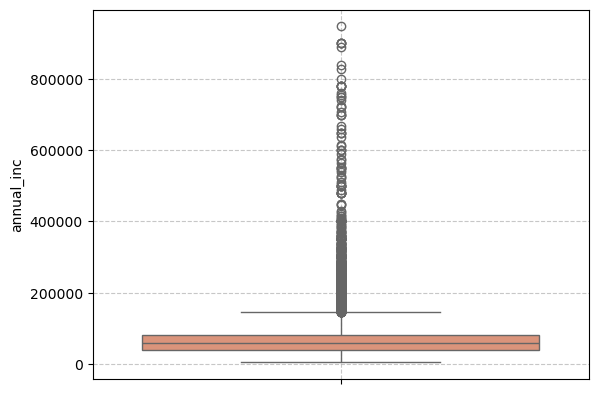

In [1242]:
#Now let's plot the annual income boxplot again to see if date looks ok

# Let's start with income, ultra high income persons might pollute the analysis due to their inherit advantage with asset and income stream
sns.boxplot(Loan_Database['annual_inc'])

# Ensure exact values in the y-axis instead of scientific notation
plt.ticklabel_format(style='plain', axis='y') 

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Now the "annual_inc" data looks good and proceeding next.
- Let's analyze other numerical variables which could possibly have outliers.
- dti
- loan_amnt
- funded_amnt_inv 

<Axes: ylabel='dti'>

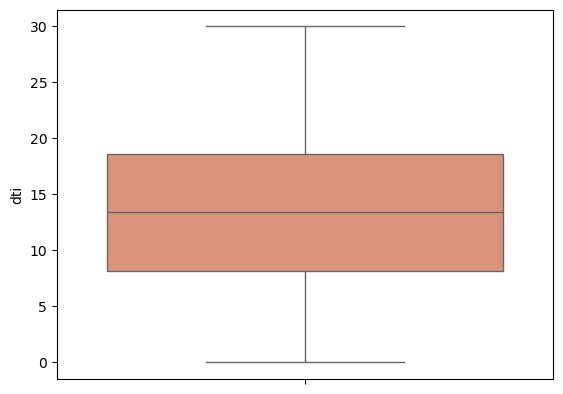

In [1245]:
# Analysing dti

sns.boxplot(Loan_Database.dti)

<Axes: ylabel='loan_amnt'>

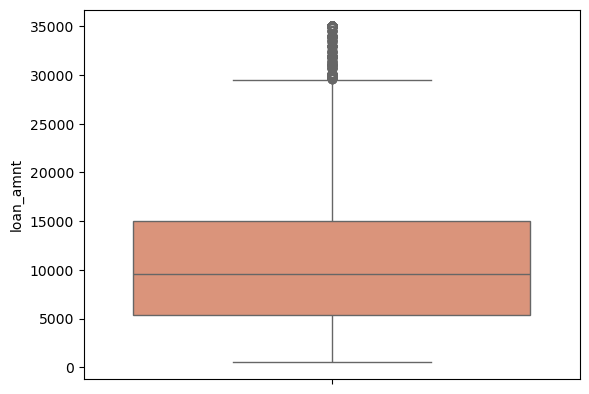

In [1246]:
#dti data looks in range. Let's analyse loan amount
sns.boxplot(Loan_Database.loan_amnt)

In [1249]:
#Let's see how many loan entry found for above 30000
Loan_Database[Loan_Database['loan_amnt'] > 30000].shape

(735, 25)

In [1251]:
#To many entry above top whisker, let's evaluate quarantile destribution to see if values goes up exponentianally
Loan_Database.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    21600.0
0.950    25000.0
0.970    28000.0
0.975    30000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: ylabel='funded_amnt_inv'>

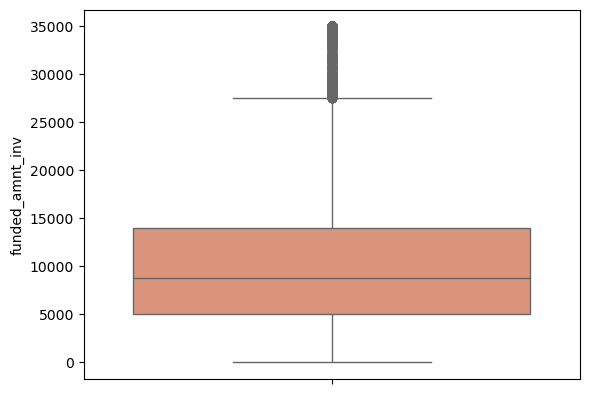

In [1253]:
#Not much differance, therefore we will keep all the data here.
#Let's analyse funded_amnt_inv
sns.boxplot(Loan_Database.funded_amnt_inv)

In [1254]:
Loan_Database.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8750.000000
0.750    14000.000000
0.900    19975.000000
0.950    24506.648556
0.970    25838.427302
0.975    27975.000000
0.980    29894.232053
0.985    30000.000000
0.990    34723.422992
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

In [1257]:
#Data looks mostly consistent, but let's see if there are lesser no of values above .985 percentile
Loan_Database[Loan_Database['funded_amnt_inv'] > 34723].shape

(386, 25)

In [1259]:
#As there are too many values, we will leave it as it won't affect analysis


<h2 style="color:darkblue; text-align:center;"><b>Visualising Categorical Data</b></h2>

## Visualizing Categorical Data 
### As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable
- We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

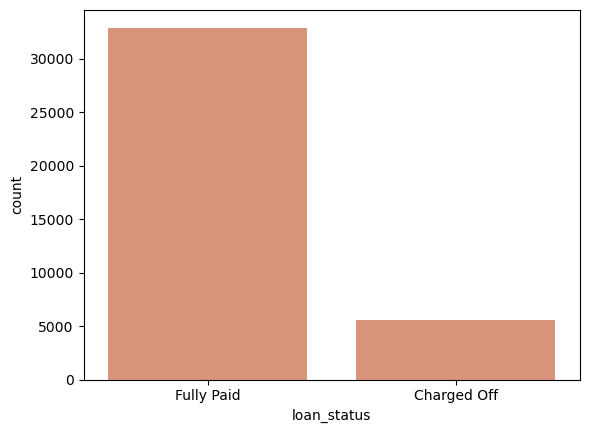

In [1263]:
sns.countplot(x = 'loan_status', data = Loan_Database)
plt.show()

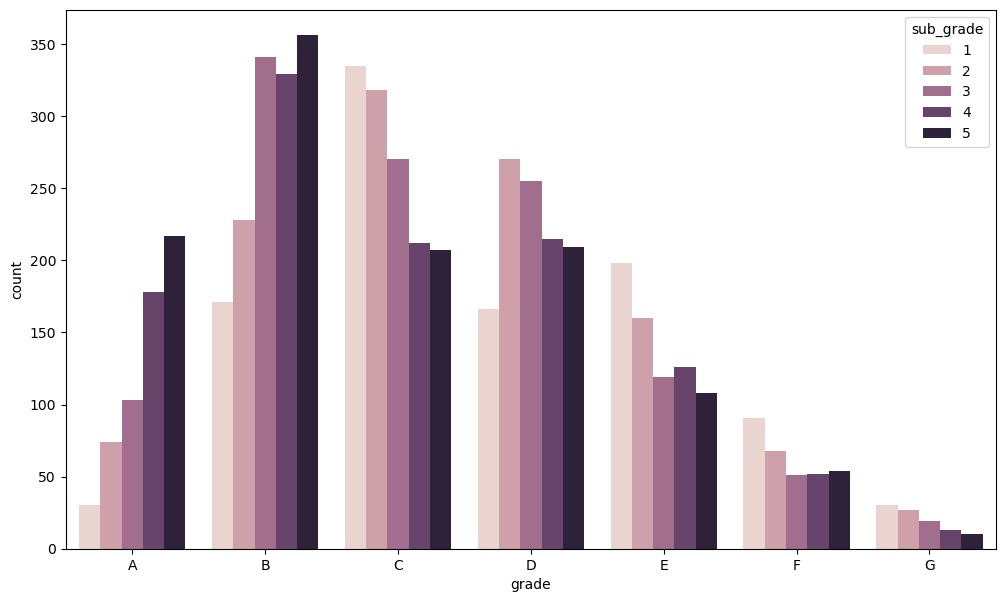

In [1265]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('flare')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = Loan_Database[Loan_Database.loan_status == 'Charged Off'])
plt.show()

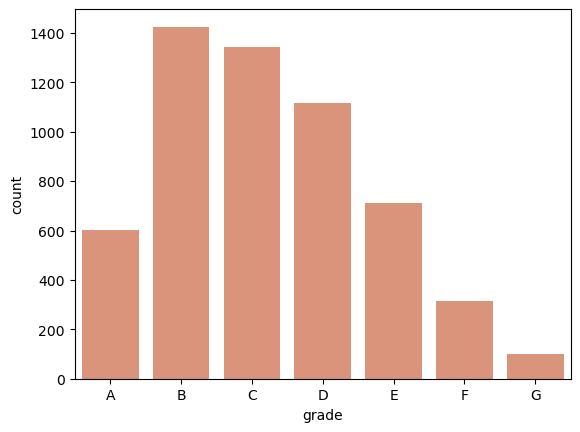

In [1266]:
sns.countplot(x = 'grade', data = Loan_Database[Loan_Database.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

### Analysing Home ownership

In [1270]:
#checking unique values for home_ownership
Loan_Database['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

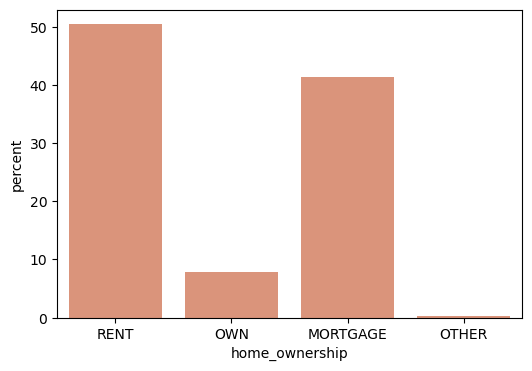

In [1272]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x='home_ownership', data=Loan_Database[Loan_Database['loan_status']=='Charged Off'],stat='percent')
plt.show()

In [1274]:
#Getting value count for each status of home ownership
count_df = Loan_Database.groupby(['home_ownership', 'loan_status']).size().reset_index(name='Count')
count_df['Percentage'] = count_df.groupby('home_ownership')['Count'].transform(lambda x: 100 * x / x.sum())
count_df

,home_ownership,loan_status,Count,Percentage
0,MORTGAGE,Charged Off,2322,13.658824
1,MORTGAGE,Fully Paid,14678,86.341176
2,OTHER,Charged Off,18,18.181818
3,OTHER,Fully Paid,81,81.818182
4,OWN,Charged Off,441,14.853486
5,OWN,Fully Paid,2528,85.146514
6,RENT,Charged Off,2829,15.337490
7,RENT,Fully Paid,15616,84.662510


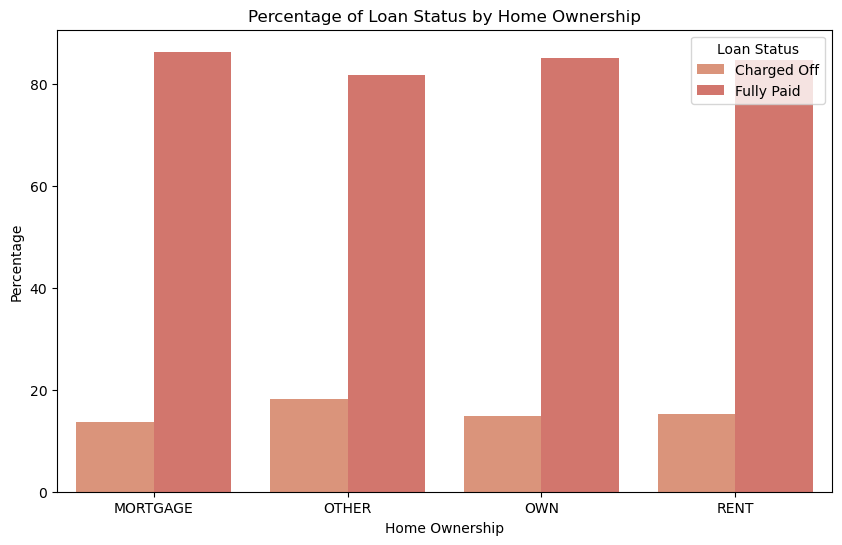

In [1276]:
# Step 3: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=count_df, x='home_ownership', y='Percentage', hue='loan_status')

# Adding labels for clarity
plt.title('Percentage of Loan Status by Home Ownership')
plt.ylabel('Percentage')
plt.xlabel('Home Ownership')
plt.legend(title='Loan Status')
plt.show()

####  Analyzing purpose

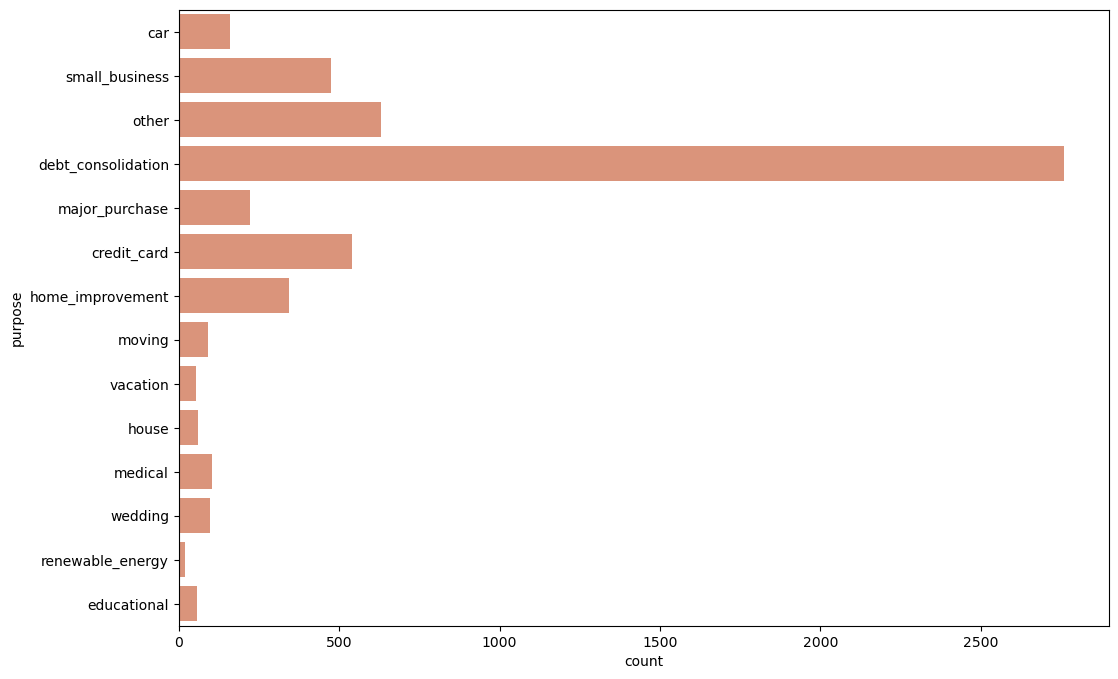

In [1279]:
fig, ax = plt.subplots(figsize = (12,8))
#ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=Loan_Database[Loan_Database.loan_status == 'Charged Off'])
plt.show()

#### Creating bins for some numerical variable to make them categorical

In [1282]:
#creating bins for int_rate,open_acc,revol_util,total_acc
Loan_Database['int_rate_groups'] = pd.cut(Loan_Database['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
Loan_Database['open_acc_groups'] = pd.cut(Loan_Database['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
Loan_Database['revol_util_groups'] = pd.cut(Loan_Database['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
Loan_Database['total_acc_groups'] = pd.cut(Loan_Database['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
Loan_Database['annual_inc_groups'] = pd.cut(Loan_Database['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [1284]:
Loan_Database.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,5000,4975.0,36,10.65,162.87,B,2,10,RENT,...,3,0,83.7,9,0.0,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500,2500.0,60,15.27,59.83,C,4,1,RENT,...,3,0,9.4,4,0.0,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400,2400.0,36,15.96,84.33,C,5,10,RENT,...,2,0,98.5,10,0.0,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000,10000.0,36,13.49,339.31,C,1,10,RENT,...,10,0,21.0,37,0.0,13%-17%,2-10,20-40,20-37,3k-31k
5,5000,5000,5000.0,36,7.90,156.46,A,4,3,RENT,...,9,0,28.3,12,0.0,5%-9%,2-10,20-40,2-20,3k-31k


#### Analyzing interest rate wrt the interest rate bins created

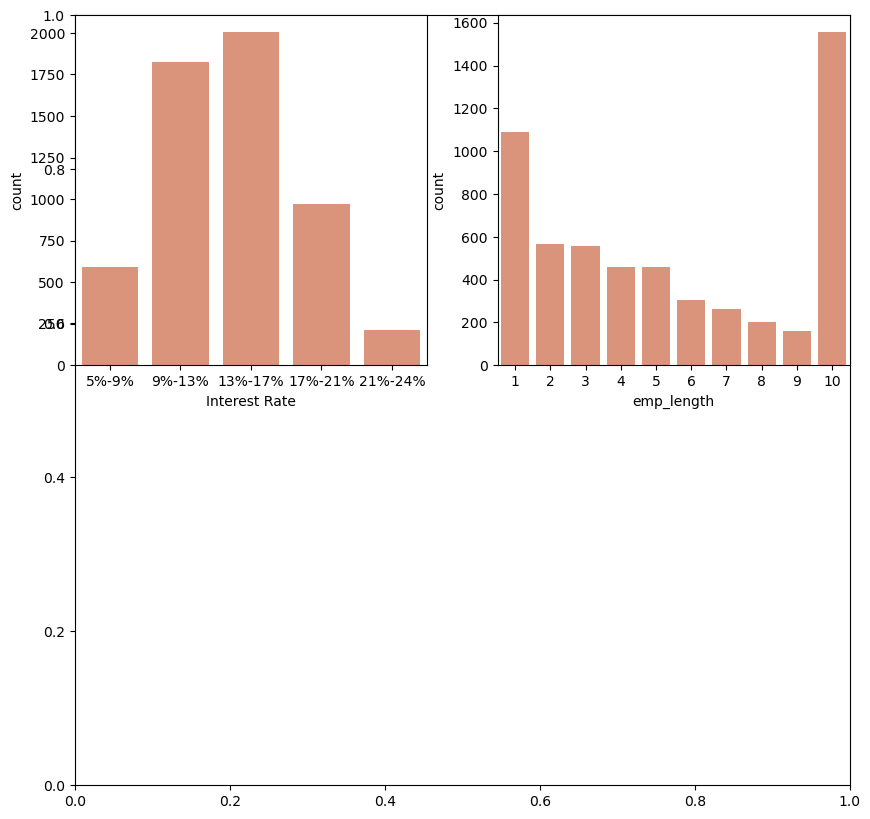

In [1287]:
fig, ax = plt.subplots(figsize = (10,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=Loan_Database[Loan_Database.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=Loan_Database[Loan_Database.loan_status == 'Charged Off'])
plt.show()

#### Similarly analyzing open_acc,revol_util,total_acc,annual_inc

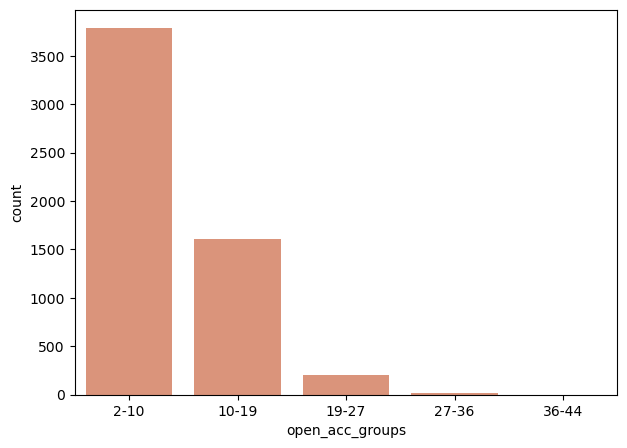

In [1289]:
fig, ax = plt.subplots(figsize = (7,5))
sns.countplot(x='open_acc_groups', data=Loan_Database[Loan_Database.loan_status == 'Charged Off'])
plt.show()

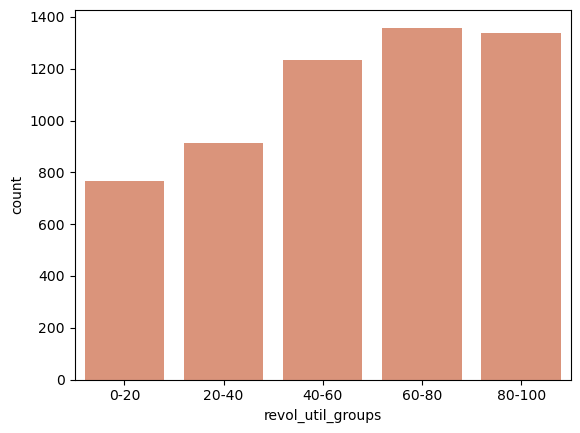

In [1291]:
sns.countplot(x='revol_util_groups', data=Loan_Database[Loan_Database.loan_status == 'Charged Off'])
plt.show()

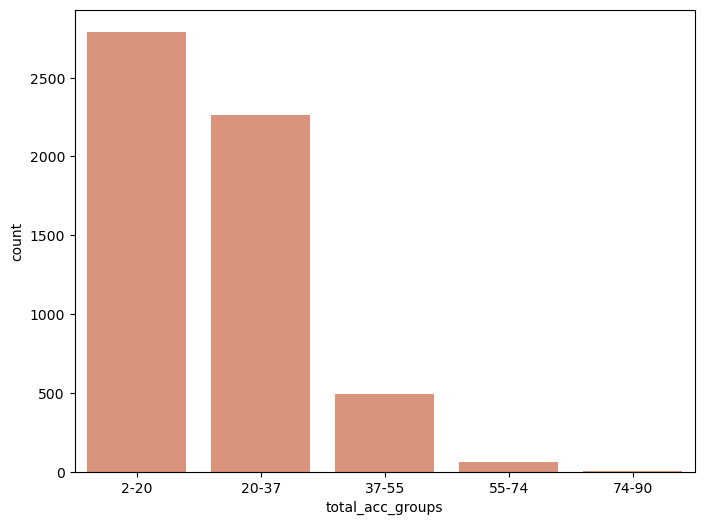

In [1294]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(x='total_acc_groups', data=Loan_Database[Loan_Database.loan_status == 'Charged Off'])
plt.show()

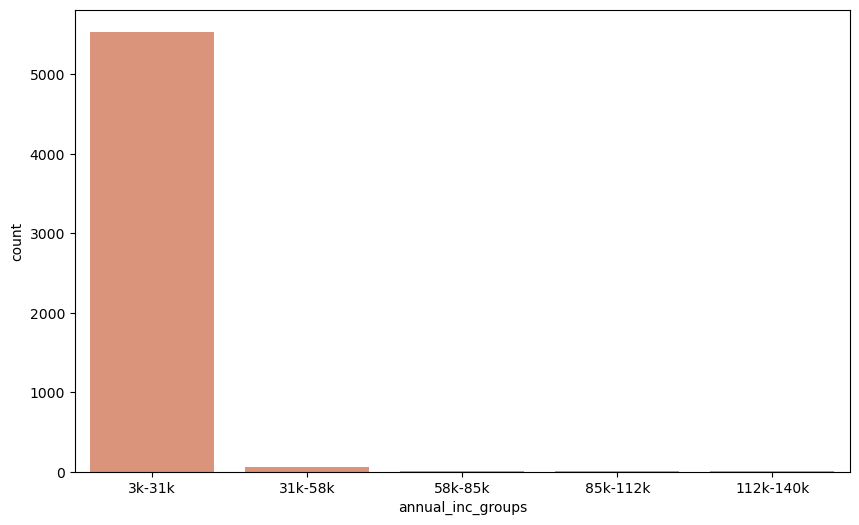

In [1296]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=Loan_Database[Loan_Database.loan_status == 'Charged Off'])
plt.show()

<Axes: xlabel='count', ylabel='term'>

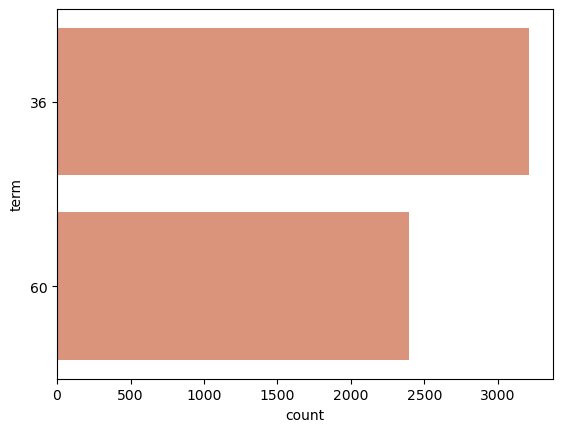

In [1298]:
sns.countplot(y='term', data=Loan_Database[Loan_Database['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

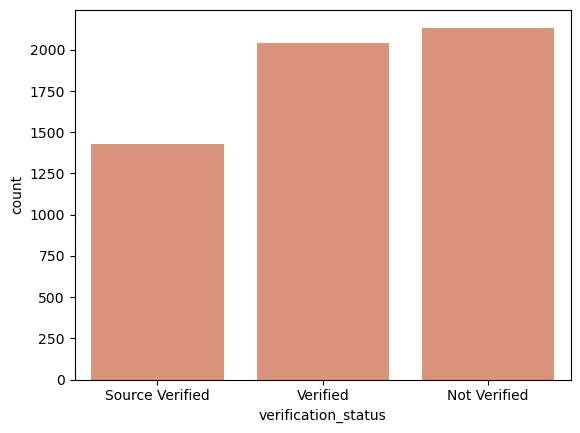

In [1300]:
sns.countplot(x='verification_status', data=Loan_Database[Loan_Database['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

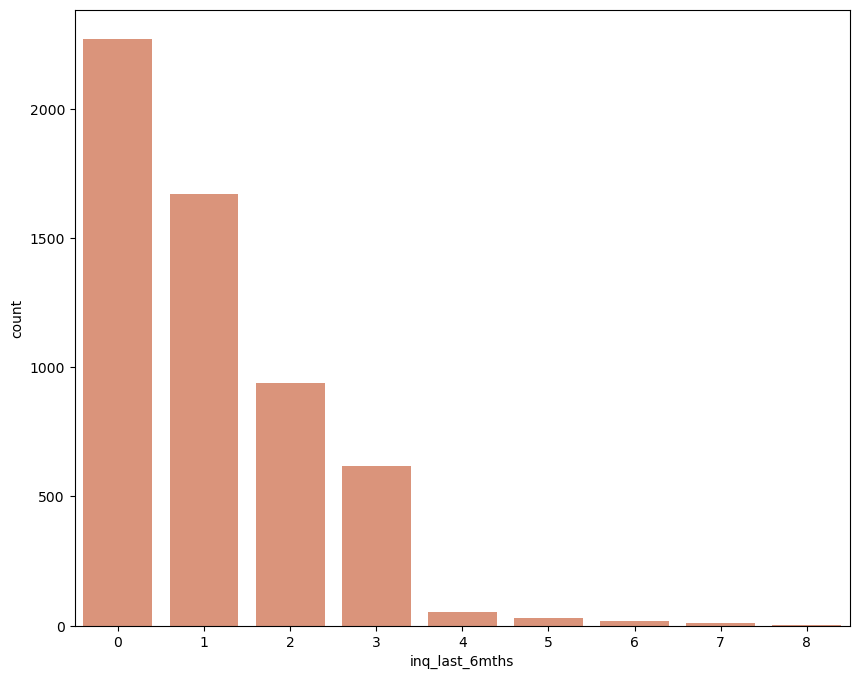

In [1302]:
fig,ax = plt.subplots(figsize = (10,8))
sns.countplot(x='inq_last_6mths', data=Loan_Database[Loan_Database['loan_status']=='Charged Off'])

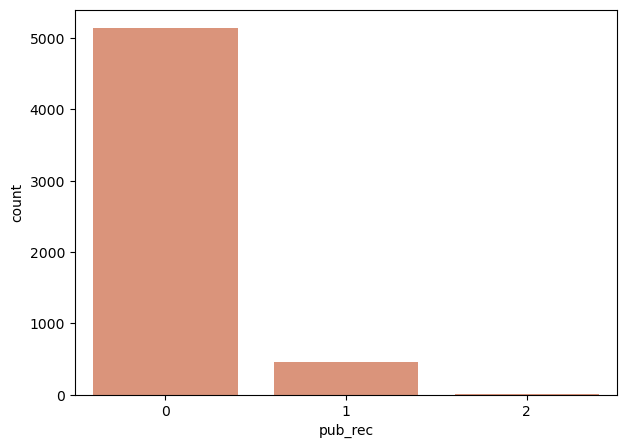

In [1304]:
fig,ax = plt.subplots(figsize = (7,5))
sns.countplot(x='pub_rec', data=Loan_Database[Loan_Database['loan_status']=='Charged Off'])
plt.show()

### Analyzing by issued month and year

In [1309]:
## Extracting month and year
df_month_year = Loan_Database['issue_d'].str.partition("-", True)     
Loan_Database['issue_month']=df_month_year[0]                       
Loan_Database['issue_year']='20' + df_month_year[2]

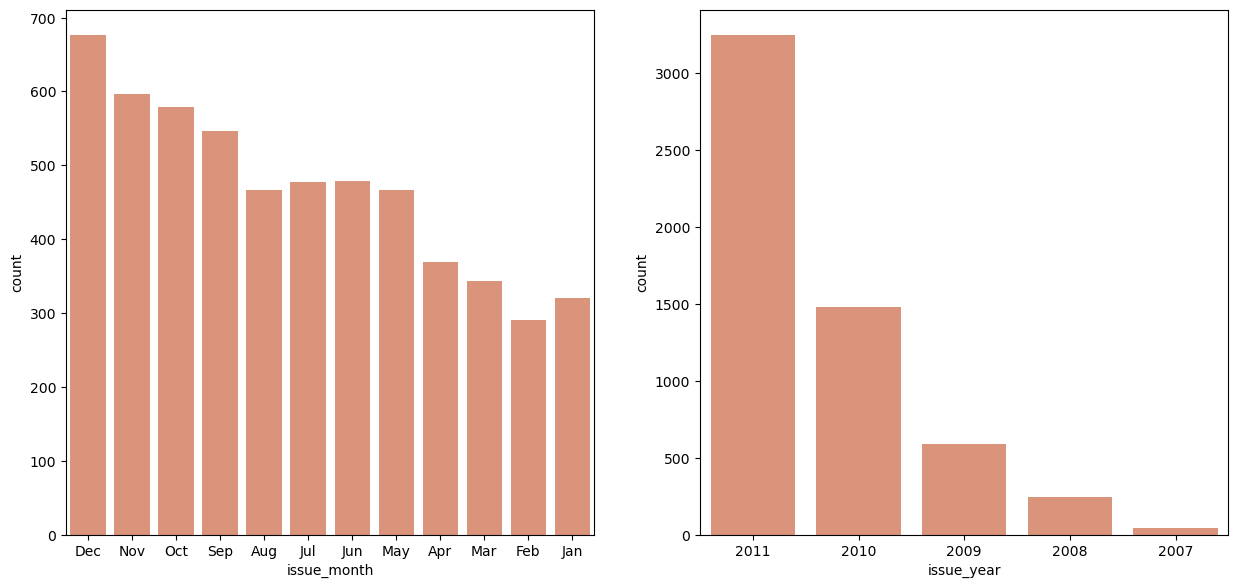

In [1319]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=Loan_Database[Loan_Database['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=Loan_Database[Loan_Database['loan_status']=='Charged Off'])
plt.show()

### Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

### Analyzing installment,dti, loan_amnt 


In [1338]:
Loan_Database['installment_groups'] = pd.cut(Loan_Database['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
Loan_Database['funded_amnt_inv_group'] = pd.cut(Loan_Database['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
Loan_Database['loan_amnt_groups'] = pd.cut(Loan_Database['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
Loan_Database['dti_groups'] = pd.cut(Loan_Database['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

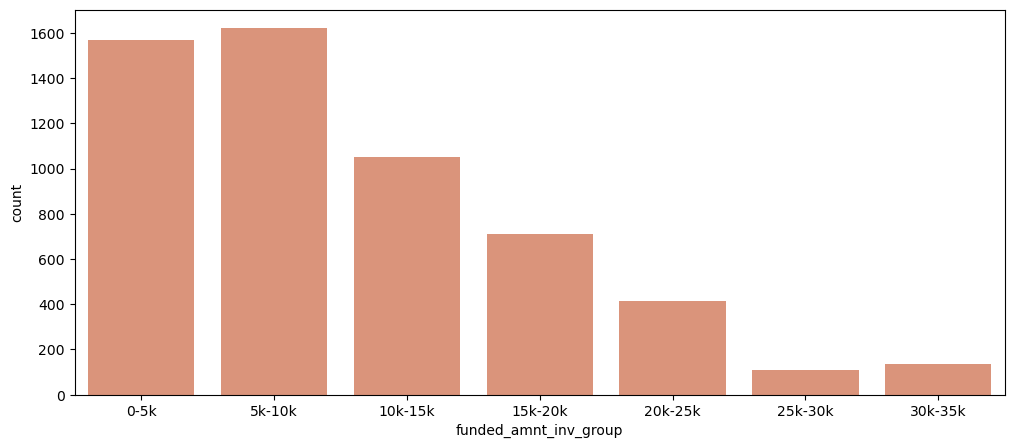

In [1343]:
fig,ax = plt.subplots(figsize = (12,5))
sns.countplot(x='funded_amnt_inv_group', data=Loan_Database[Loan_Database['loan_status']=='Charged Off'])
plt.show()

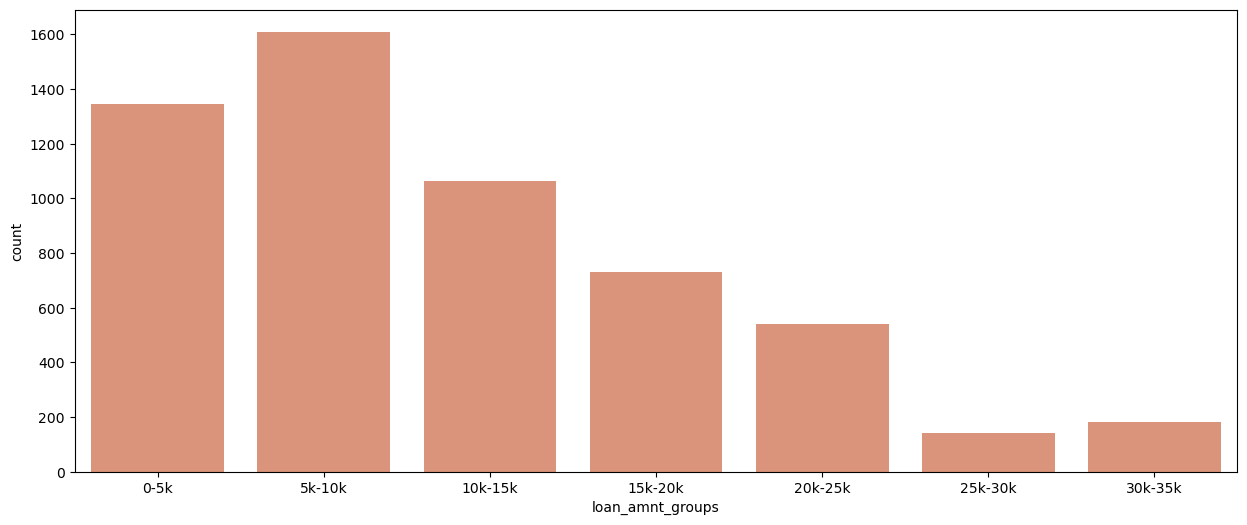

In [1350]:
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(x='loan_amnt_groups', data=Loan_Database[Loan_Database['loan_status']=='Charged Off'])
plt.show()

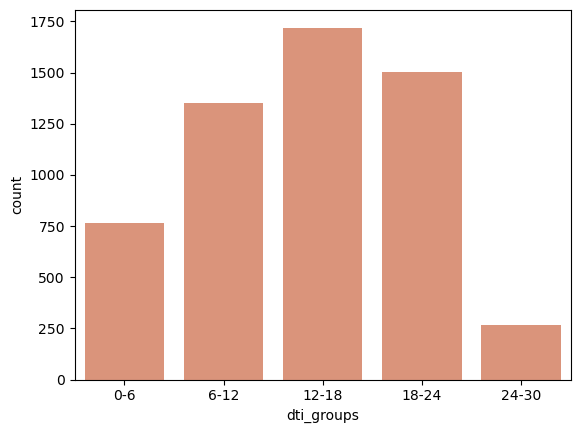

In [1355]:
sns.countplot(x='dti_groups', data=Loan_Database[Loan_Database['loan_status']=='Charged Off'])
plt.show()

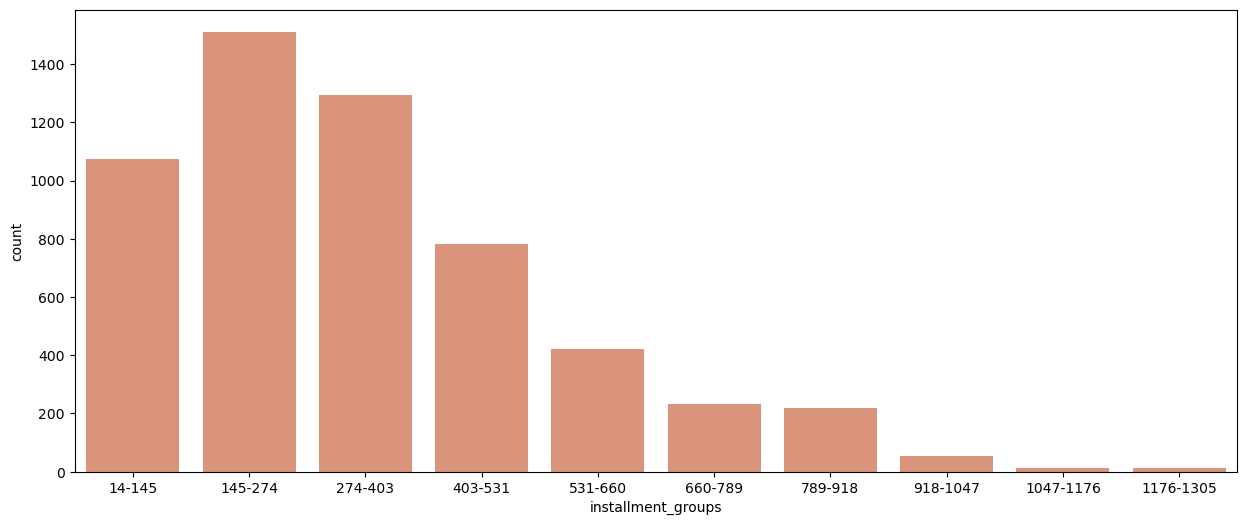

In [1362]:
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(x='installment_groups', data=Loan_Database[Loan_Database['loan_status']=='Charged Off'])
plt.show()

# Observations

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants who have 20-37 open_acc
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the number of derogatory public records is 0
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.


### Also there is a very interesting observation from the date issued. The late months of an year indicated the high possibility of defaulting. 
- The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin)

## Analysing annual income with other columns for more insights

#### 1.Annual income vs loan purpose

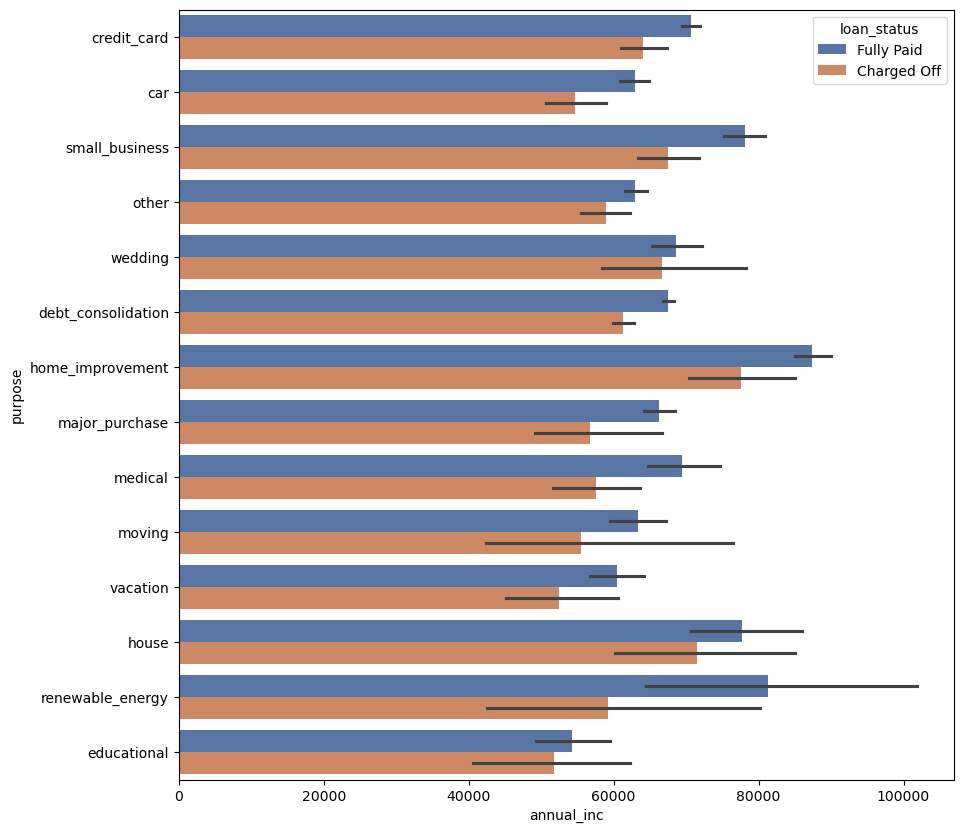

In [1381]:
plt.figure(figsize=(10,10))
sns.barplot(data =Loan_Database,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest. 
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### 2.Annual income vs home ownership

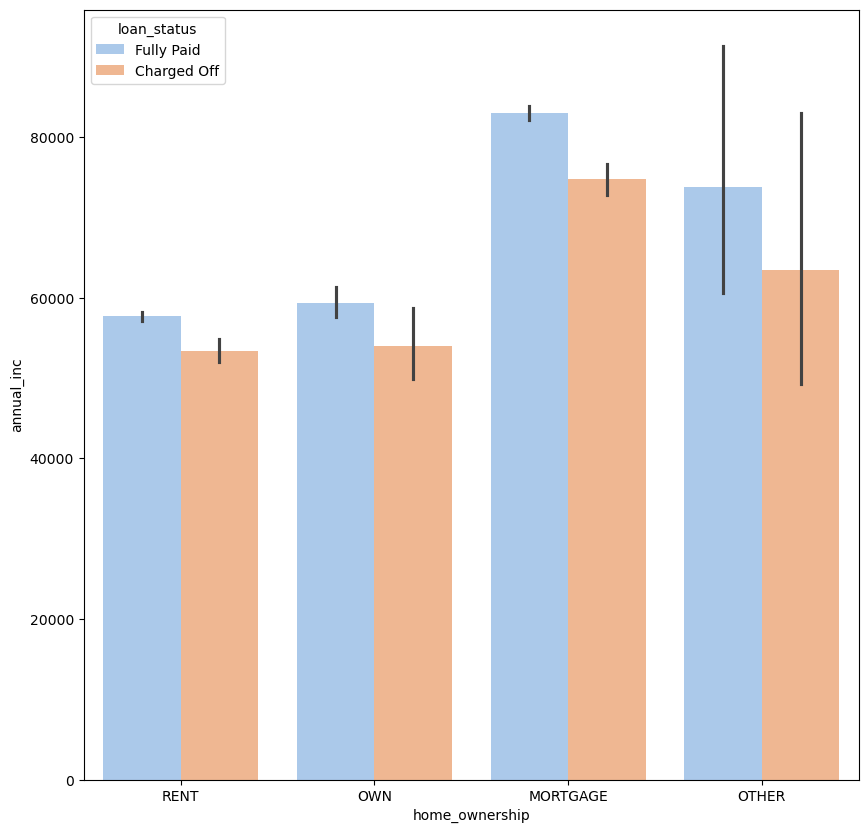

In [1389]:
plt.figure(figsize=(10,10))
sns.barplot(data =Loan_Database,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

### Annual Income vs Loan amount

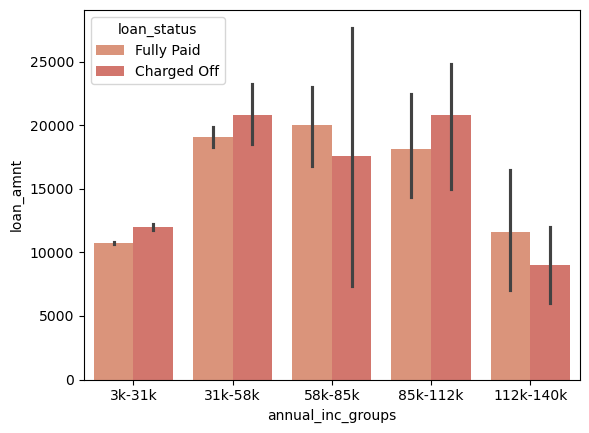

In [1398]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = Loan_Database)
plt.show()

### Across all the income groups, the loan_amount is higher for people who defaulted.

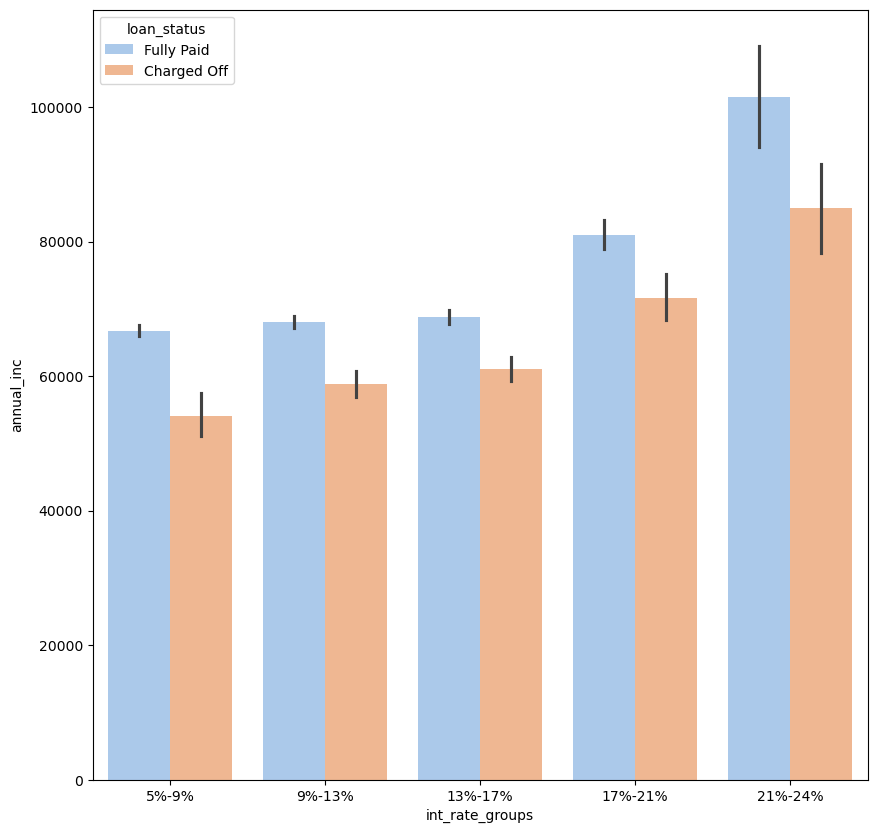

In [1403]:
plt.figure(figsize=(10,10))
sns.barplot(data =Loan_Database,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## Analysing loan_amount with other columns for more insights 

#### 1.Loan Amount vs Interest Rate

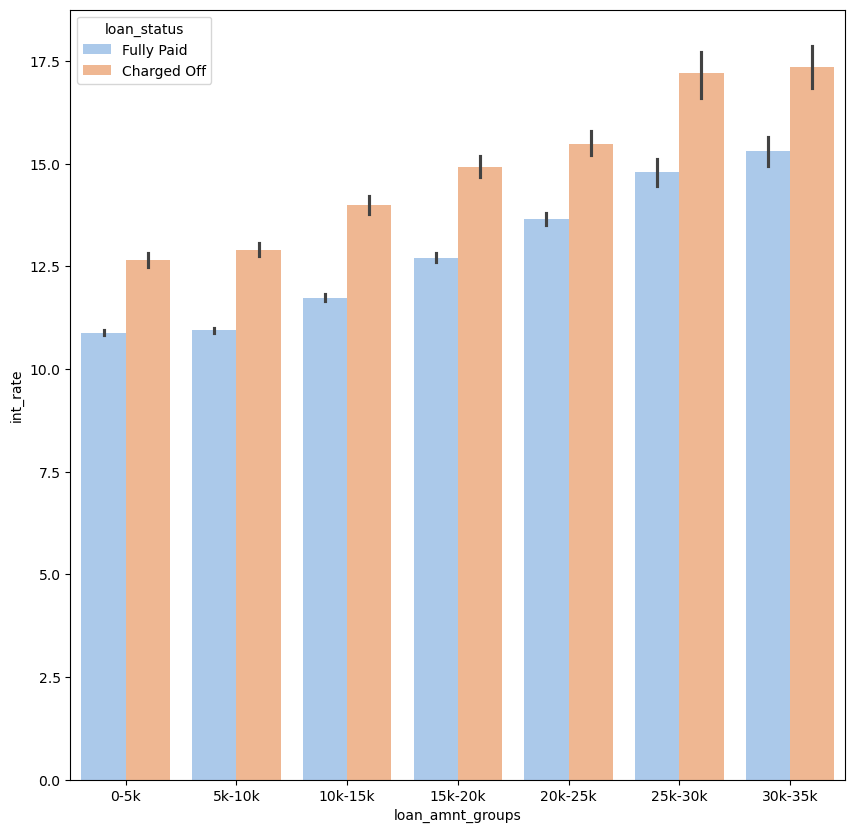

In [1411]:
plt.figure(figsize=(10,10))
sns.barplot(data =Loan_Database,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### 2.Loan vs Loan purpose

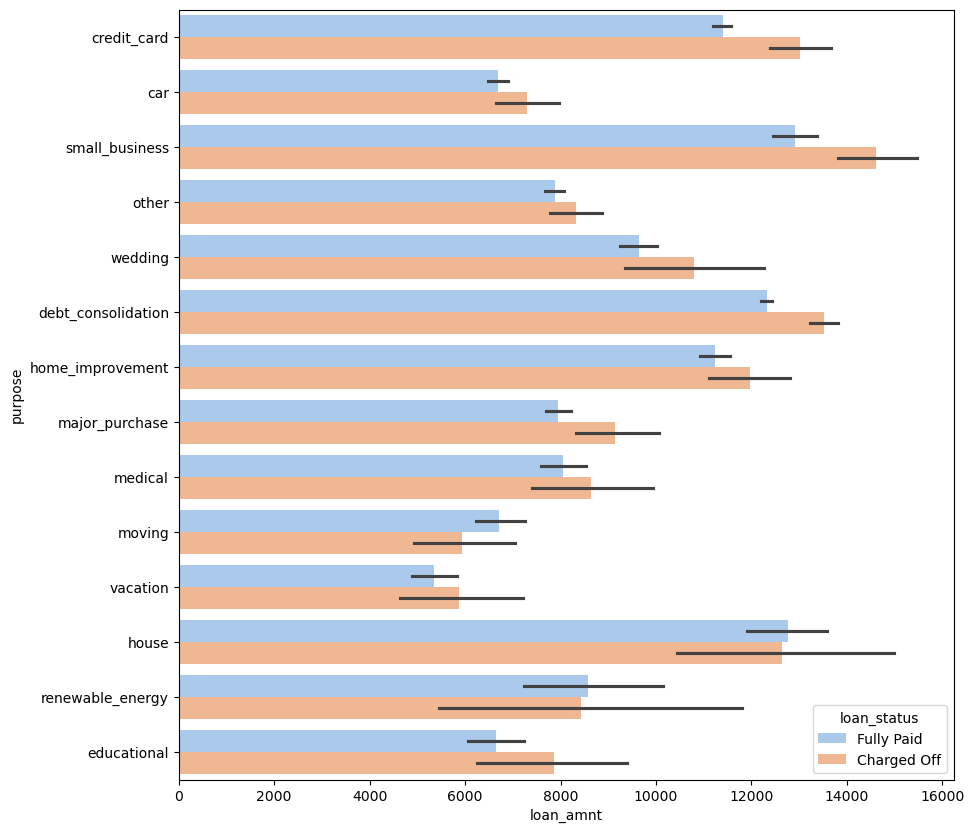

In [1418]:
plt.figure(figsize=(10,10))
sns.barplot(data =Loan_Database,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### 3.Loan vs House Ownership

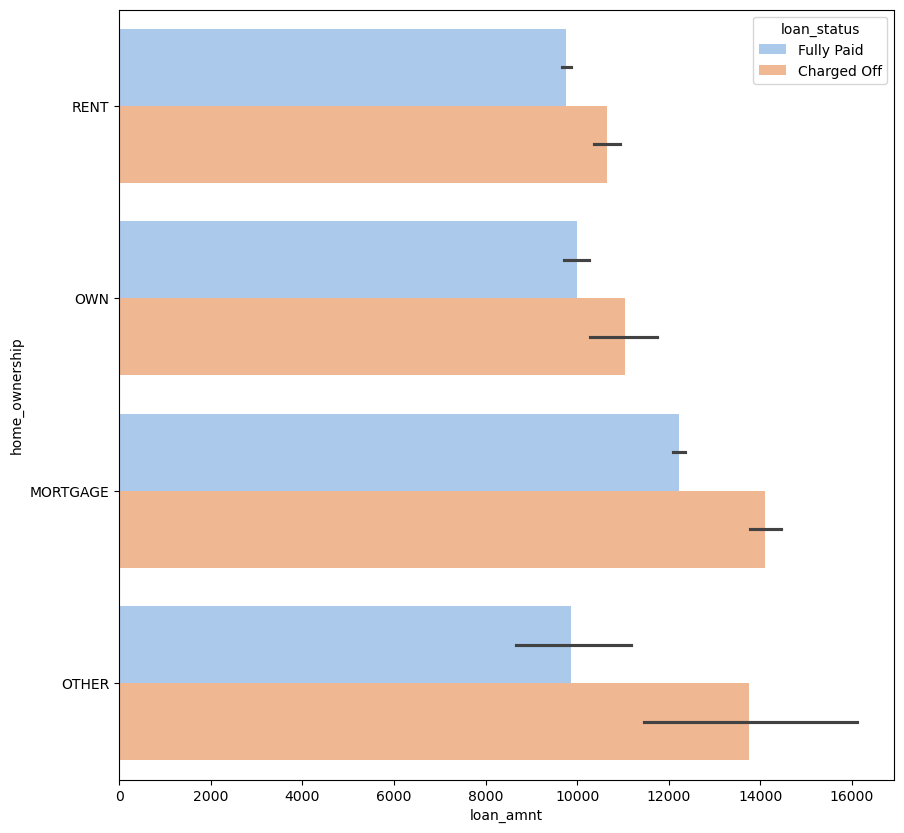

In [1423]:
plt.figure(figsize=(10,10))
sns.barplot(data =Loan_Database,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### 4.Loan amount vs month issued and year issued

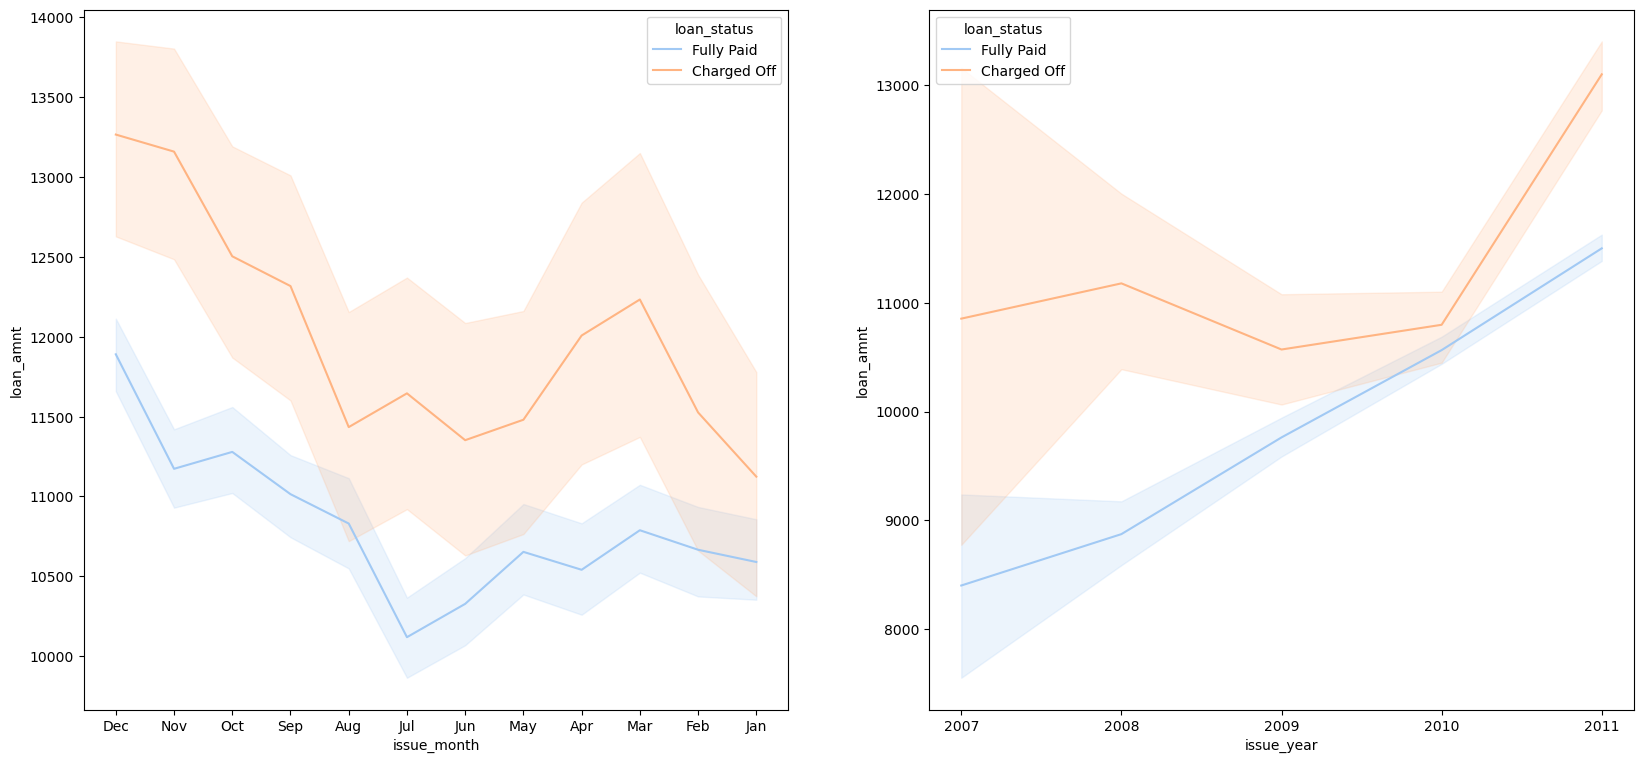

In [1451]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =Loan_Database,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =Loan_Database.sort_values(by='issue_year'),y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")
plt.show()

#### 5.Loan amount vs Grade

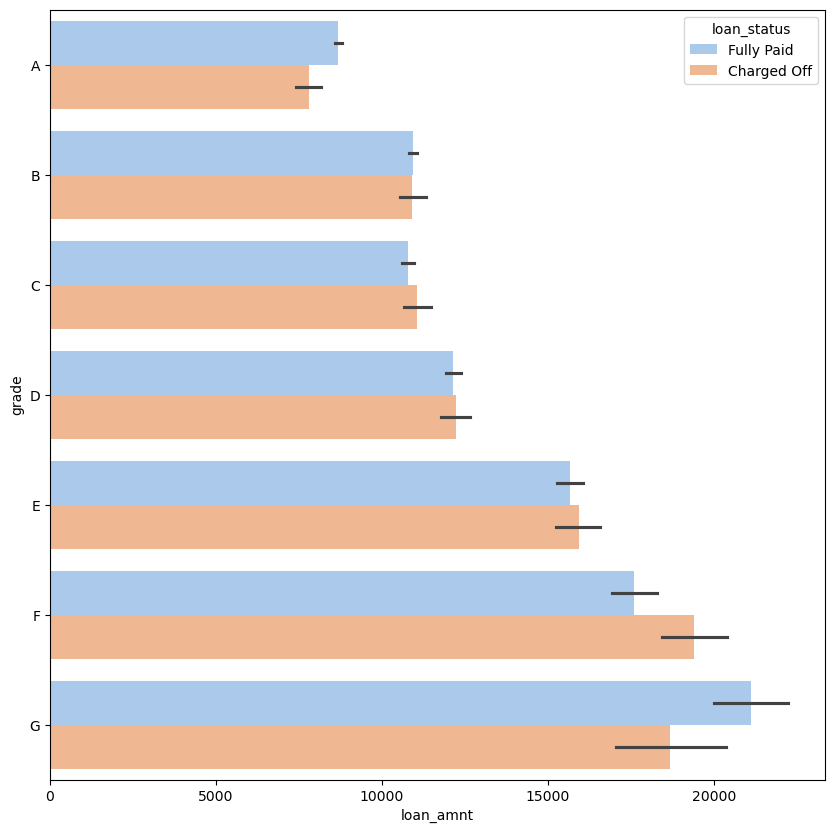

In [1440]:
plt.figure(figsize=(10,10))
sns.barplot(data =Loan_Database,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

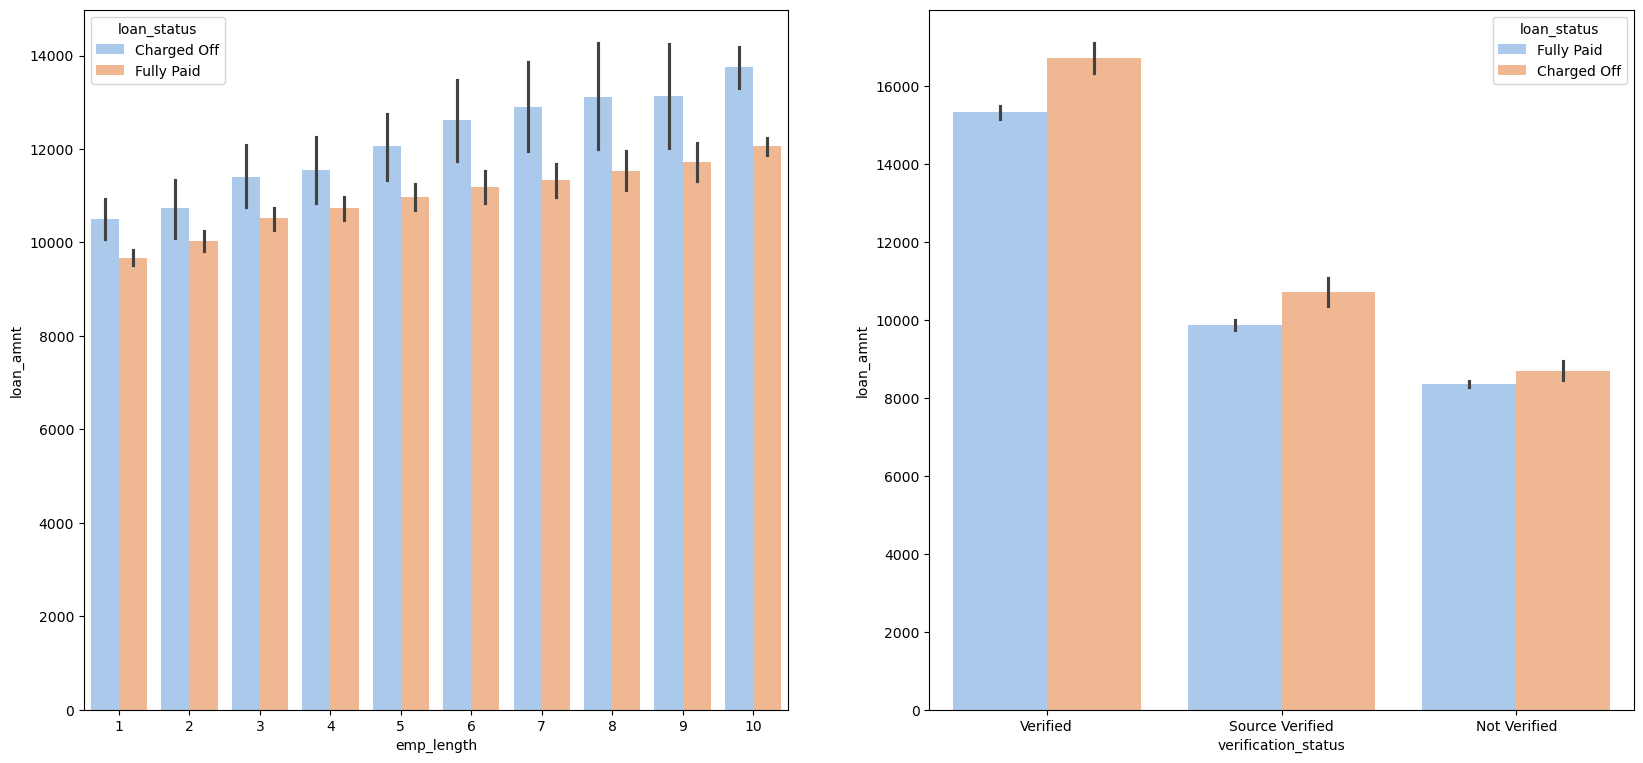

In [1458]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =Loan_Database,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =Loan_Database,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")
plt.show()

### Employees with longer working history got the loan approved for a higher amount. 
- Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

#### grade vs interest rate

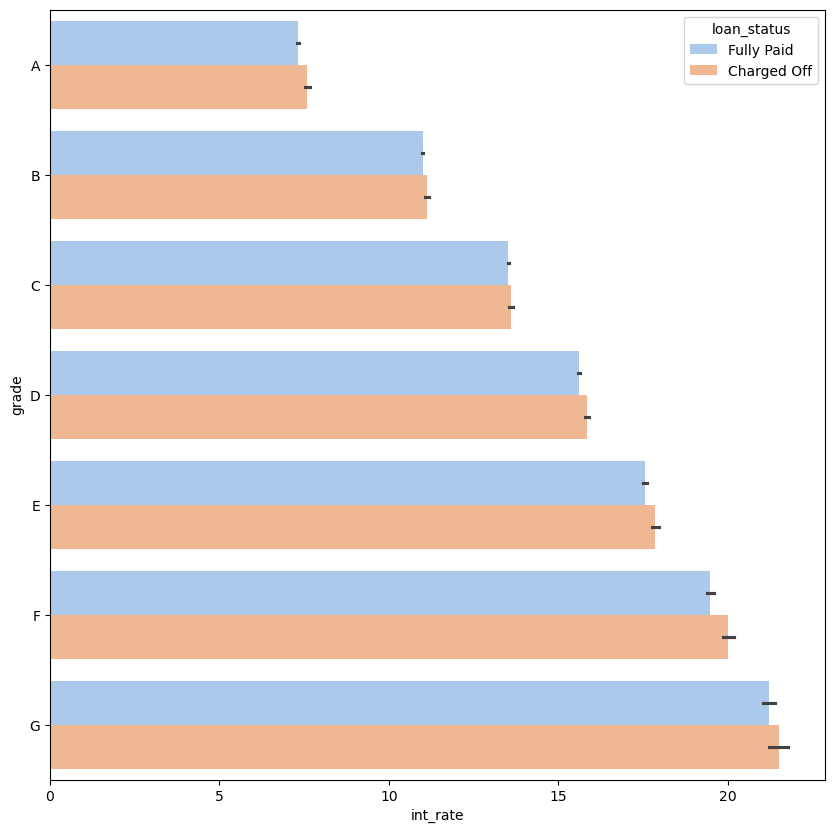

In [1467]:
plt.figure(figsize=(10,10))
sns.barplot(data =Loan_Database,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

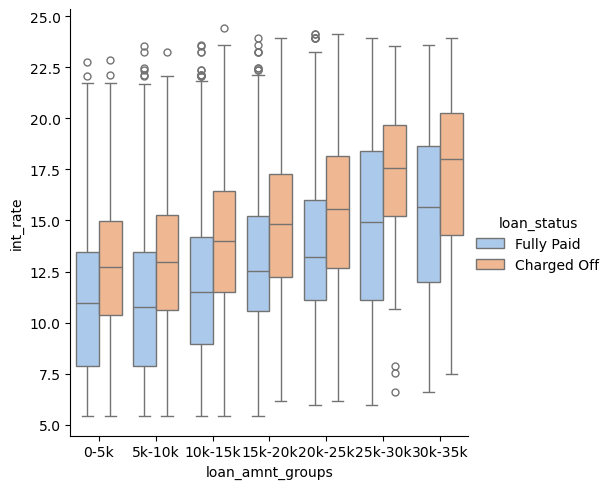

In [1472]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =Loan_Database,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')
plt.show()

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
- This can be a pretty strong driving factor for loan defaulting.

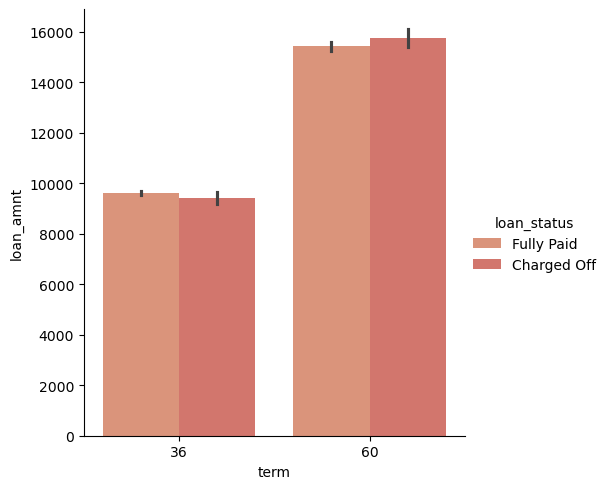

In [1479]:
sns.catplot(x = 'term', y = 'loan_amnt', data = Loan_Database,hue = 'loan_status', kind = 'bar')
plt.show()

### Applicants who applied and defaulted have no significant difference in loan_amounts.
- Which means that applicants applying for long term has applied for more loan. 

# Observations

### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k 
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%